In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

In [20]:
# Function to simulate imbalanced data with scores
def simulate_imbalanced_data(pos_ratio, n_samples=10000):
    n_pos = int(n_samples * pos_ratio)
    y_true = np.concatenate([np.ones(n_pos), np.zeros(n_samples - n_pos)])
    
    # Simulate scores that are generally higher for positive class
    pos_scores = np.random.beta(2, 2, n_pos)
    neg_scores = np.random.beta(2, 5, n_samples - n_pos)
    y_scores = np.concatenate([pos_scores, neg_scores])
    
    y_pred = (y_scores > 0.5).astype(int)
    return y_true, y_pred, y_scores

In [21]:
def show_distribution(pos_ratio):
    #pos_ratio = 0.5
    n_samples=10000
    n_pos = int(n_samples * pos_ratio)
    y_true = np.concatenate([np.ones(n_pos), np.zeros(n_samples - n_pos)])

    # Simulate scores that are generally higher for positive class
    pos_scores = np.random.beta(2, 2, n_pos)
    neg_scores = np.random.beta(2, 5, n_samples - n_pos)

    # Create the plot
    plt.figure(figsize=(5, 3))
    plt.hist(pos_scores, bins=30, alpha=0.5, label='Positive Scores', color='blue')
    plt.hist(neg_scores, bins=30, alpha=0.5, label='Negative Scores', color='red')

    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title(f'Positive Ratio = {p}')
    plt.legend()

    # Add a vertical line at the default threshold of 0.5
    plt.axvline(x=0.5, color='green', linestyle='--', label='Default Threshold (0.5)')
    plt.legend()

    plt.tight_layout()
    plt.show()

We constructed a model using two beta distributions: one for positive samples and another for negative samples. To evaluate the model's performance under varying conditions, we conducted simulations using test sets with different positive-to-negative ratios. Our aim was to assess how imbalanced data affects various performance metrics, including accuracy, true positive rate (TPR), true negative rate (TNR), positive predictive value (PPV), F1 score, and area under the ROC curve (AUC).

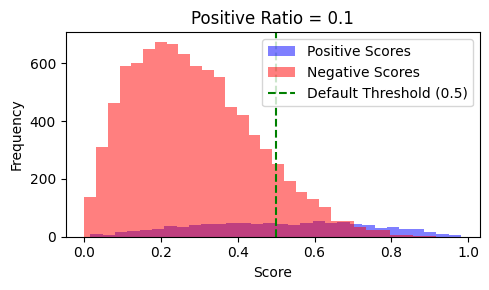

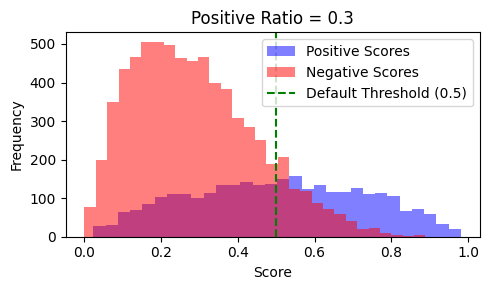

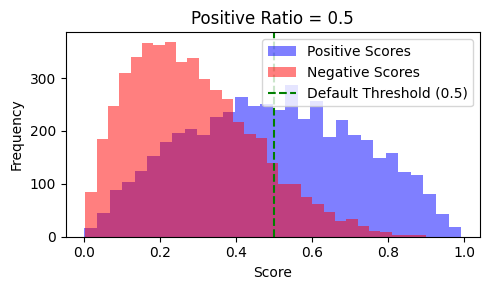

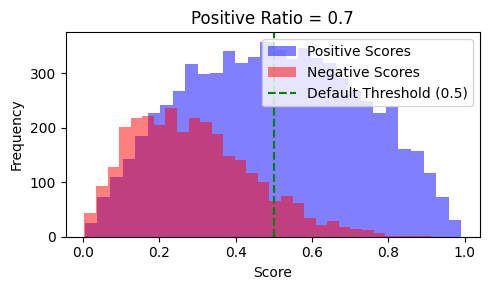

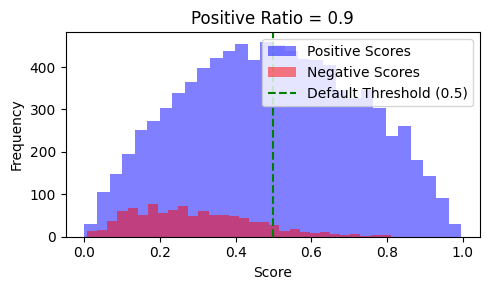

In [22]:
for p in [0.1, 0.3, 0.5, 0.7, 0.9]:
    show_distribution(p)

1. Accuracy:
- Advantage: Provides a simple, intuitive measure of overall correctness across all classes.
- Disadvantage: Can be misleading for imbalanced datasets, as it may show high values even when the model performs poorly on the minority class.

2. True Positive Rate (TPR) / Recall / Sensitivity:
- Advantage: Measures the model's ability to correctly identify positive cases.
- Disadvantage: Doesn't account for false positives, which can be misleading in imbalanced datasets.

3. True Negative Rate (TNR) / Specificity:
- Advantage: Measures the model's ability to correctly identify negative cases.
- Disadvantage: Doesn't account for false negatives, which can be problematic in certain scenarios (e.g., medical diagnosis).

4. Precision:
- Advantage: Measures the accuracy of positive predictions, useful when false positives are costly.
- Disadvantage: Doesn't consider false negatives, can be misleading in imbalanced datasets.

5. F1 Score:
- Advantage: Balances precision and recall, providing a single metric for model performance.
- Disadvantage: Assumes equal importance of precision and recall, which may not always be appropriate.

6. Area Under the ROC Curve (AUC):
- Advantage: Provides an aggregate measure of performance across all classification thresholds.
- Disadvantage: Can be less interpretable and may be misleading for highly imbalanced datasets.

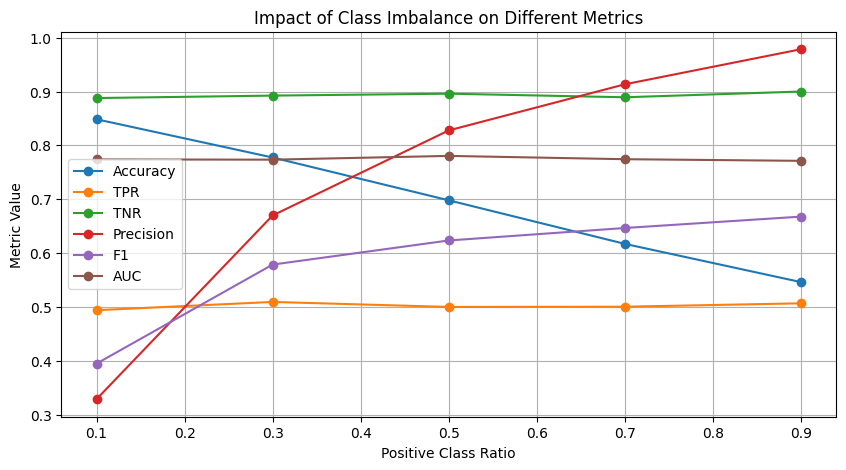

In [23]:
# Demonstrate impact of class imbalance on metrics
ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
metrics = {'Accuracy':[], 'TPR': [], 'TNR': [], 'Precision': [], 'F1': [], 'AUC': []}

for ratio in ratios:
    y_true, y_pred, y_scores = simulate_imbalanced_data(ratio)
    metrics['Accuracy'].append(accuracy_score(y_true, y_pred))
    metrics['TPR'].append(recall_score(y_true, y_pred))
    metrics['TNR'].append(sum((y_true == 0) & (y_pred == 0)) / sum(y_true == 0))
    metrics['Precision'].append(precision_score(y_true, y_pred))
    metrics['F1'].append(f1_score(y_true, y_pred))
    metrics['AUC'].append(roc_auc_score(y_true, y_scores))

# Plot metrics vs class balance
plt.figure(figsize=(10, 5))
for metric, values in metrics.items():
    plt.plot(ratios, values, marker='o', label=metric)
plt.xlabel('Positive Class Ratio')
plt.ylabel('Metric Value')
plt.title('Impact of Class Imbalance on Different Metrics')
plt.legend()
plt.grid(True)
plt.show()

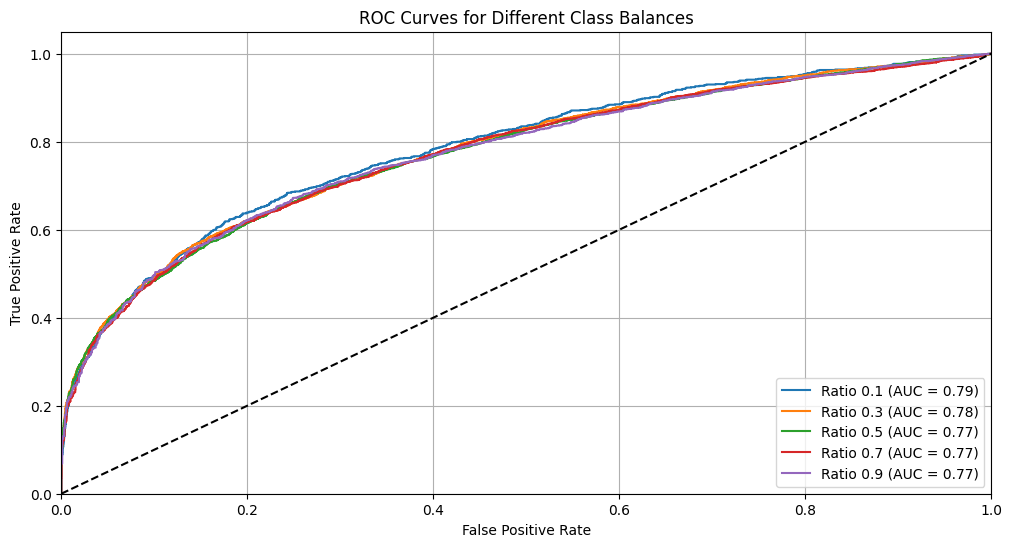

In [24]:
# Plot ROC curves for different class balances
plt.figure(figsize=(12, 6))
for ratio in ratios:
    y_true, _, y_scores = simulate_imbalanced_data(ratio)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'Ratio {ratio:.1f} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Class Balances')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Conclusion

The performance metrics Accuracy, Precision, and F1 score can be significantly influenced by the proportion of positive samples in the test set. Given that no single metric can comprehensively evaluate a model's performance, it is advisable to employ a diverse range of metrics. This approach allows for a more thorough assessment of the model's capabilities from various perspectives. By considering multiple metrics simultaneously, researchers and practitioners can gain a more nuanced and complete understanding of the model's strengths and weaknesses across different aspects of its performance.